In [3]:
# PACKAGES and TABLES
collection_table ="2_song_fields_id-tags_lufs_BPM.pkl"
direc = '/Users/yerik/_apple_source/PY/JUPY/py2ms/ms_MUSIC_COLLECTION/'

import pandas as pd
# bring up # Bring in data collection table
df_id = pd.read_pickle(f'{direc}/{collection_table}')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/yerik/_apple_source/PY/JUPY/py2ms/ms_MUSIC_COLLECTION//2_song_fields_id-tags_lufs_BPM.pkl'

In [4]:
df_id.head()

,Name,file_id,Type,Extension,Size (MB),bitrate,Duration,duration_minutes,Path,idt_title,idt_artist,idt_album,idt_year,idt_track,idt_genre,idt_comment,idt_audio_offset,lufs
0,Audio Werner -,Audio Werner - -MB-155.10988235473633.aiff,File,.aiff,155.109882,2117.209475,614.561769,10.242696,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_1...,?,Audio Werner,HCF18,2011,2,NaN,Visit https://audiowerner.bandcamp.com,80.0,86.893
1,Felipe Gordon -,Felipe Gordon --MB-138.17667770385742.aiff,File,.aiff,138.176678,2121.105754,546.464966,9.107749,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_1...,The Colombian Excursions Of House Music ft. To...,Felipe Gordon,A Landscape Onomatopeya LP,2021,3,NaN,9B,80.0,86.800
2,Afriqua - Aleph,Afriqua - Aleph-MB-136.5160369873047.aiff,File,.aiff,136.516037,2304.867220,496.852708,8.280878,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_1...,Aleph,Afriqua,Aleph EP,2017,1,NaN,e9_obscure,80.0,85.162
3,AD Bourke & ROT,AD Bourke & ROT-MB-132.29957580566406.aiff,File,.aiff,132.299576,2305.985401,481.273333,8.021222,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_1...,RAW (Ron Trent Remix),AD Bourke & ROTLA,RAW (includes Ron Trent Remix),2018,1,NaN,Visit https://adbourkandrotla.bandcamp.com,80.0,83.582
4,Felipe Gordon -,Felipe Gordon --MB-130.2373752593994.aiff,File,.aiff,130.237375,2121.201649,515.043107,8.584052,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_1...,How Do U Spell That Spell,Felipe Gordon,A Landscape Onomatopeya LP,2021,1,NaN,10A,80.0,85.691


# SIZE

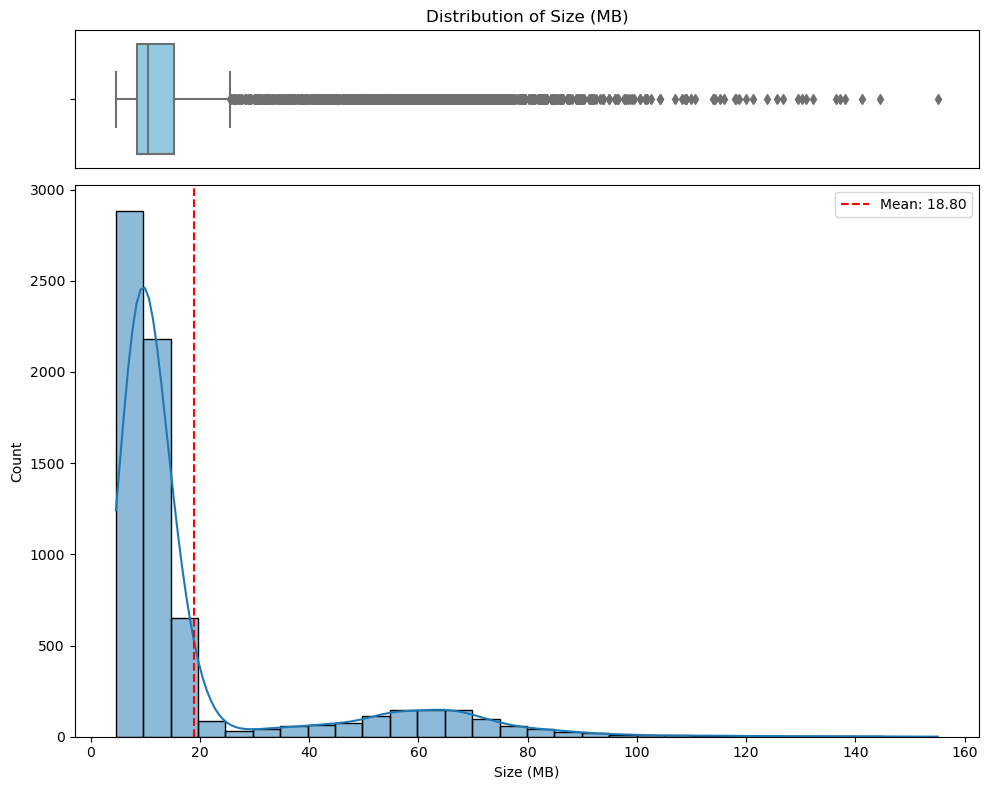

In [3]:
exec(open(f"{direc}/_ms_EDA_1_numeric_var_graph.py",encoding="utf-8").read())
visualize_distribution(df_id, 'Size (MB)')

# bitrate

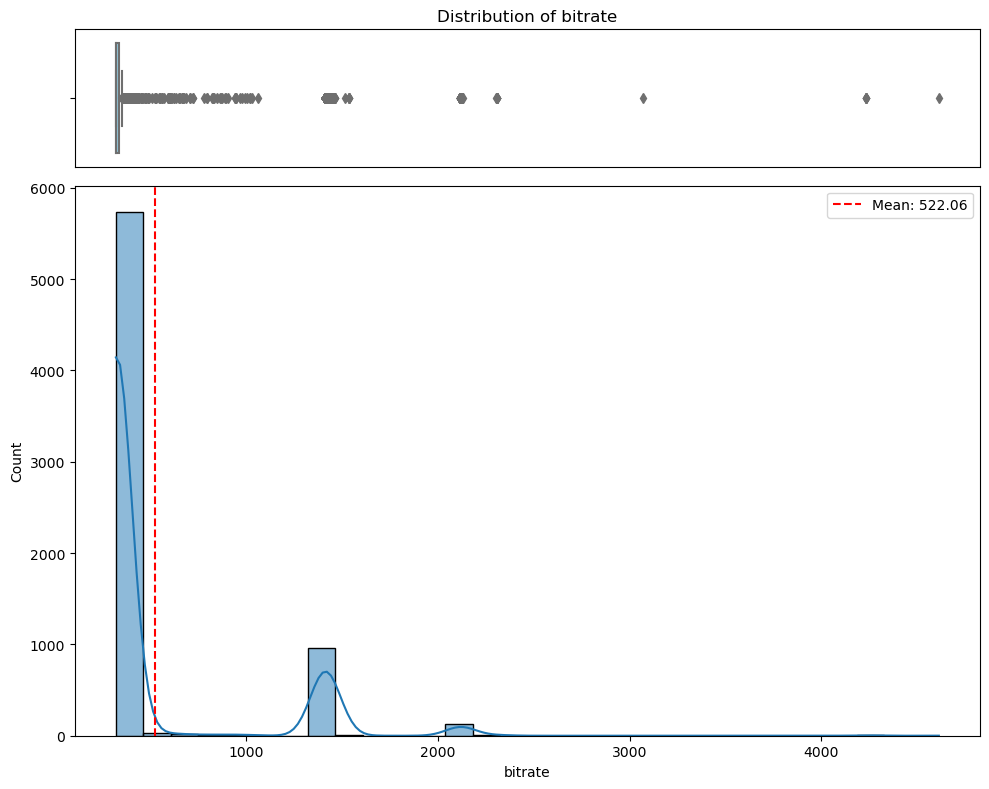

In [4]:
visualize_distribution(df_id, 'bitrate')

# LUFS

In [5]:
# 

                Name    lufs
289  Jade Cicada - B  90.905
842  Deep Deep Maste  90.432
874  Pulse Master.wa  89.979
262  Jade Cicada - B  89.745
612  tokyo drift rem  89.729
660  AEOLUS - BATTLE  89.718
674  AEOLUS - DESiRE  89.692
389  Detroit Flex Ma  89.572
665  AEOLUS & GiN-B   89.553

                  Name    lufs
943   WATUPDOE FT LOL -26.557
5027  Pepino Di Capi  -24.320
6796  fr_pieg-14_03_2 -23.400


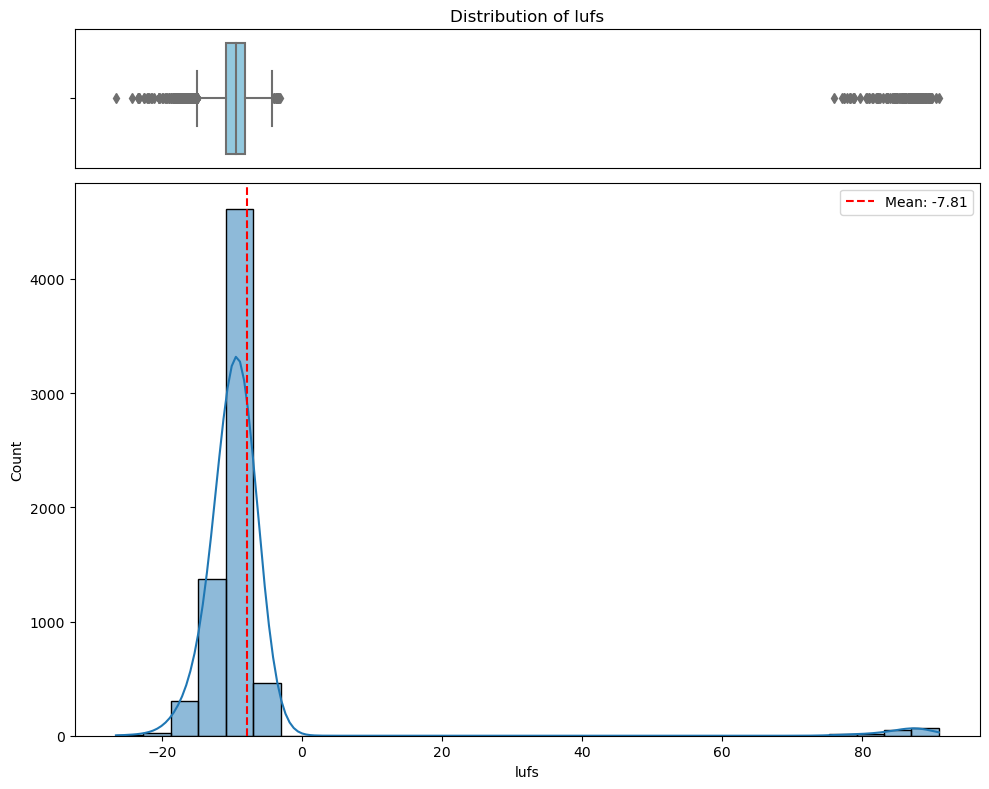

In [6]:
sorted_tracks = df_id.sort_values(by='lufs', ascending=False)
print(sorted_tracks[['Name', 'lufs']].head(9))  # top 10 loudest tracks


sorted_tracks_a = df_id.sort_values(by='lufs', ascending=True)
print('\n',sorted_tracks_a[['Name', 'lufs']].head(3))  # top 10 loudest tracks

visualize_distribution(df_id, 'lufs')

# DURATION

                 Name  duration_minutes
6760  13_Gramatik_Now          2.001415
6634  04-Unhappy girl          2.003290
6633  fr_pieg-14_03_2          2.003290


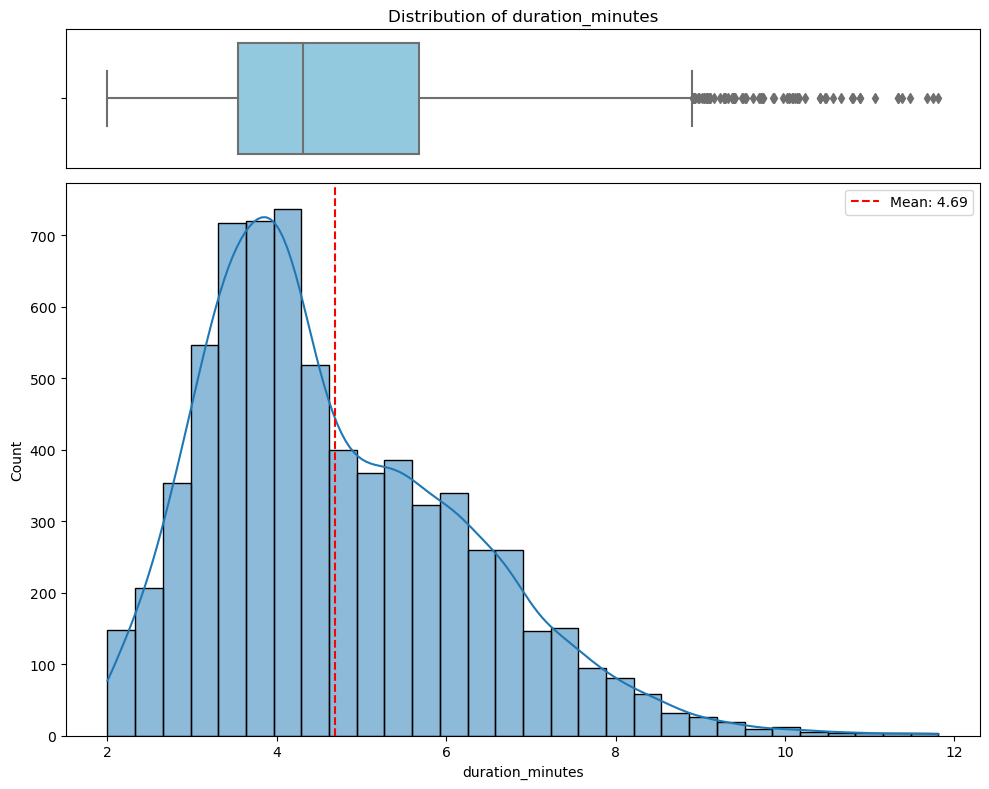

In [7]:
# DURATION
sorted_tracks = df_id.sort_values(by='duration_minutes', ascending=True)
print(sorted_tracks[['Name', 'duration_minutes']].head(3))  # top 10 loudest tracks

#
visualize_distribution(df_id, 'duration_minutes')

# CLUSTER ANALYSIS

In [8]:
df_id['Size (MB)'].isnull().sum()

0

In [9]:
df_id['bitrate'].isnull().sum()

0

In [10]:


# CLuster by duration , bit rate and , size, and lufs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample data (use your own if you have it already)



# Ensuring the columns contain numeric data
df_id = df_id[pd.to_numeric(df_id['lufs'], errors='coerce').notna()]
df_id = df_id[pd.to_numeric(df_id['bitrate'], errors='coerce').notna()]
#df_id = df_id[pd.to_numeric(df_id['Duration'], errors='coerce').notna()]

# Standardize the selected columns
columns_to_scale = ['lufs', 'bitrate']
scaler = StandardScaler()
df_id[columns_to_scale] = scaler.fit_transform(df_id[columns_to_scale])

# Find the Optimal Number of Clusters using Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_id[columns_to_scale])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# You'll determine the number of clusters from the plot
optimal_clusters = 3  # Replace with your desired number
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clustered = kmeans.fit_predict(df_id[columns_to_scale])

# Visualize
plt.scatter(df_id[clustered == 0]['lufs'], df_id[clustered == 0]['bitrate'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df_id[clustered == 1]['lufs'], df_id[clustered == 1]['bitrate'], s = 100, c = 'blue', label = 'Cluster 2')
# Add more scatter plots if you have more than 2 clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of lufs and bitrate')
plt.xlabel('lufs (standardized)')
plt.ylabel('bitrate (standardized)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
print(df_id.dtypes)


In [ ]:
columns = ['Name','file_id','Type','Extension','Size (MB)','bitrate','Duration','duration_minutes','Path',
 'idt_title','idt_artist','idt_album','idt_year','idt_track','idt_genre','idt_comment','idt_audio_offset']

# Function to select columns
def select_columns(df, columns):
    # Keep only the columns that exist in the dataframe
    selected_columns = [col for col in columns if col in df.columns]
    return df[selected_columns]

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_id)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset

# # Preprocessing
features = ['Duration', 'bitrate', 'Size (MB)', 'lufs']
X = df_id[features]

# # It's crucial to standardize the features since they might have different scales
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Determining the number of clusters with the Elbow method
# wcss = []  # within-cluster sum of squares
# for i in range(1, 11):  # you can also check for more clusters if needed
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#     kmeans.fit(X_scaled)
#     wcss.append(kmeans.inertia_)
    
# plt.figure(figsize=(10,5))
# plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

# # Choose an optimal number of clusters based on the Elbow plot and fit KMeans
# optimal_clusters = 3 # this is just an example, adjust based on your Elbow plot
# kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
# clusters = kmeans.fit_predict(X_scaled)

# df['Cluster'] = clusters

# # Now you can analyze or visualize the clusters using df
# print(df.groupby('Cluster').mean())


In [ ]:
# It's crucial to standardize the features since they might have different scales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determining the number of clusters with the Elbow method
wcss = []  # within-cluster sum of squares
for i in range(1, 11):  # you can also check for more clusters if needed
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    